In [2]:
!pip install librosa

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

import os

In [4]:
directory_path = "/kaggle/input/cremad/AudioWAV/"
audio_file_name = "1001_DFA_ANG_XX.wav"
audio_path = os.path.join(directory_path, audio_file_name)


In [5]:
samples, sampling_rate = librosa.load(audio_path, sr = None, mono = True, offset = 0.0, duration = None, res_type = 'kaiser_best')
len(samples), sampling_rate

(36409, 16000)

## Emotion

#### Thus, duration of the audio file is : 2.28 s approx. (Duration = number of samples / sampling rate)

In [6]:
from IPython.display import Audio
Audio(audio_path)

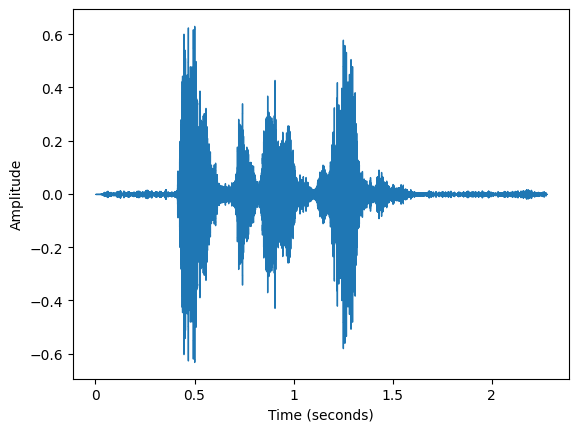

In [7]:
from librosa import display
plt.figure()
librosa.display.waveshow(y = samples, sr = sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [8]:
import numpy as np
from scipy.io import wavfile
_, audio_data = wavfile.read(audio_path)
audio_data = audio_data.astype(np.float32)

In [9]:
pitch = librosa.piptrack(y=audio_data, sr=sampling_rate)[0]
fundamental_frequency_index = np.argmax(pitch)
fundamental_frequency_hz = fundamental_frequency_index * (sampling_rate / len(pitch))
print(f"Estimated Fundamental Frequency: {fundamental_frequency_hz} Hz")

Estimated Fundamental Frequency: 575094.6341463415 Hz


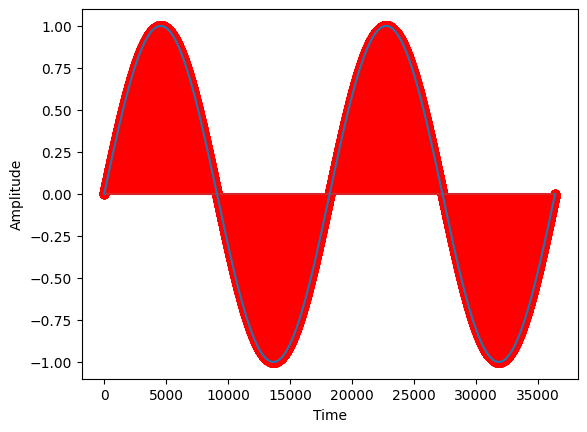

In [10]:
samples= 36409
frequency = 2
x = np.arange(samples)
y1 = np.sin(2*np.pi*frequency * (x/samples))
plt.figure()
plt.stem(x,y1,'r',)
plt.plot(x,y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

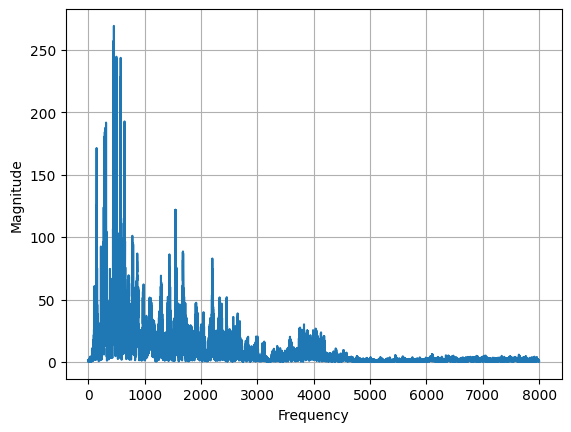

In [11]:
# Frequency graph 
from scipy.fft import fft
import scipy.io.wavfile as wav
import scipy
sampling_rate, audio_data = wav.read(audio_path)

n = len(audio_data)
T = 1/(sampling_rate)
yf = fft(audio_data)
xf = np.linspace(0.0, 1.0/(2.0*T), int(n/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [12]:
y, sr = librosa.load(audio_path)

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

In [13]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

In [14]:
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

Text(0.5, 1.0, 'MFCCs')

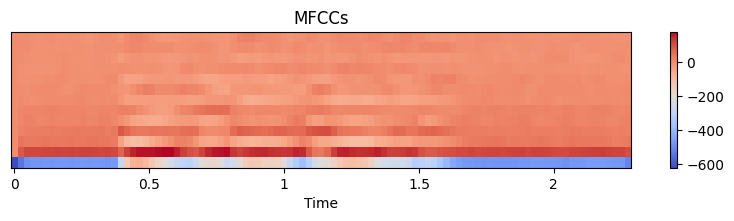

In [15]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')

Text(0.5, 1.0, 'Chroma')

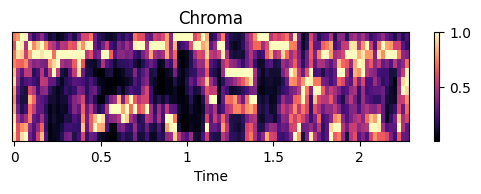

In [16]:
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma, x_axis='time')
plt.colorbar()
plt.title('Chroma')

Text(0.5, 1.0, 'Spectral Contrast')

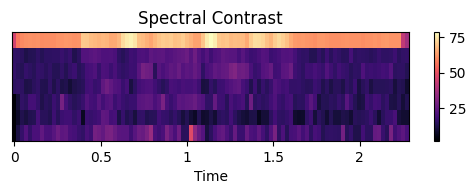

In [17]:
plt.subplot(3, 1, 3)
librosa.display.specshow(spectral_contrast, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')

In [18]:
print("MFCCs shape:", mfccs.shape)
print("Chroma shape:", chroma.shape)

MFCCs shape: (13, 99)
Chroma shape: (12, 99)


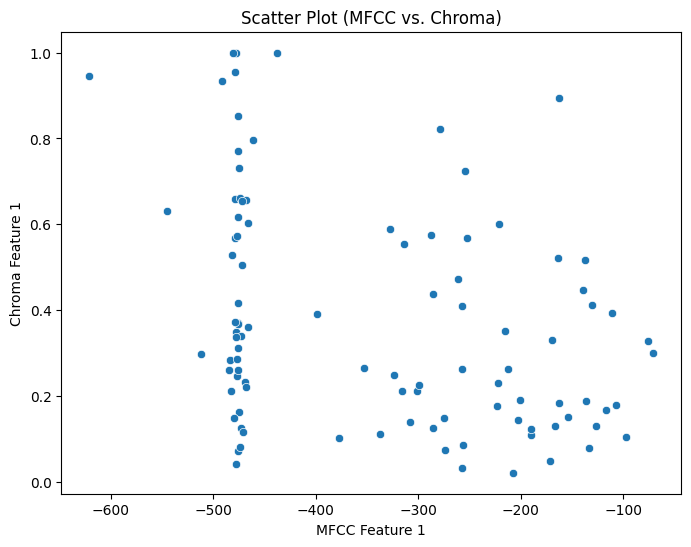

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.scatterplot(x=mfccs[0, :], y=chroma[0, :])
plt.title('Scatter Plot (MFCC vs. Chroma)')
plt.xlabel('MFCC Feature 1')
plt.ylabel('Chroma Feature 1')

plt.show()


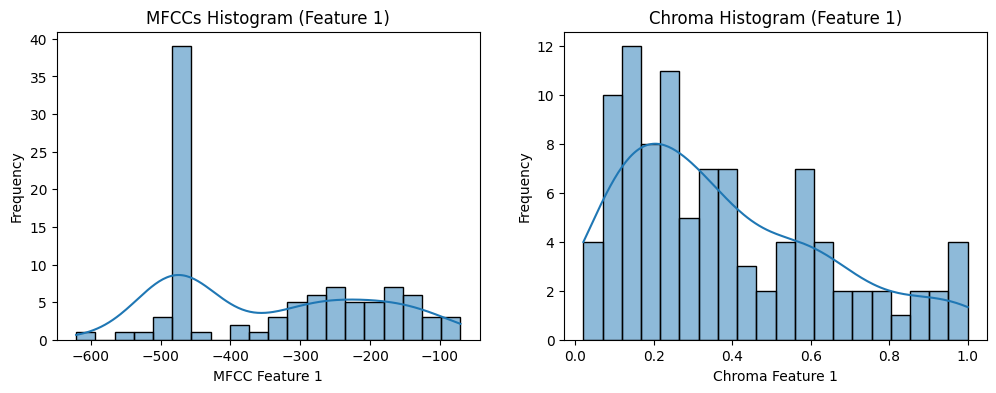

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Mfcc histogram
sns.histplot(mfccs[0, :], bins=20, kde=True, ax=axes[0])
axes[0].set_title('MFCCs Histogram (Feature 1)')
axes[0].set_xlabel('MFCC Feature 1')
axes[0].set_ylabel('Frequency')
# Chrome histogram
sns.histplot(chroma[0, :], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Chroma Histogram (Feature 1)')
axes[1].set_xlabel('Chroma Feature 1')
axes[1].set_ylabel('Frequency')
plt.show()


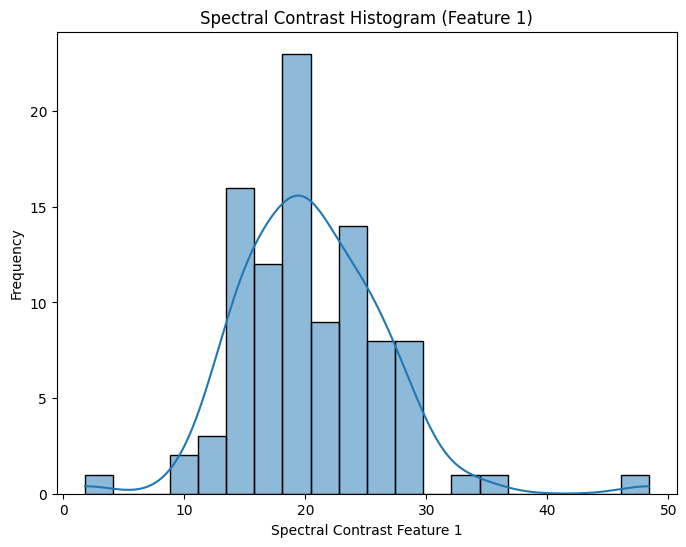

In [21]:
plt.figure(figsize=(8, 6))
feature_index = 0
sns.histplot(spectral_contrast[feature_index, :], bins=20, kde=True)
plt.title(f'Spectral Contrast Histogram (Feature {feature_index + 1})')
plt.xlabel(f'Spectral Contrast Feature {feature_index + 1}')
plt.ylabel('Frequency')
plt.show()

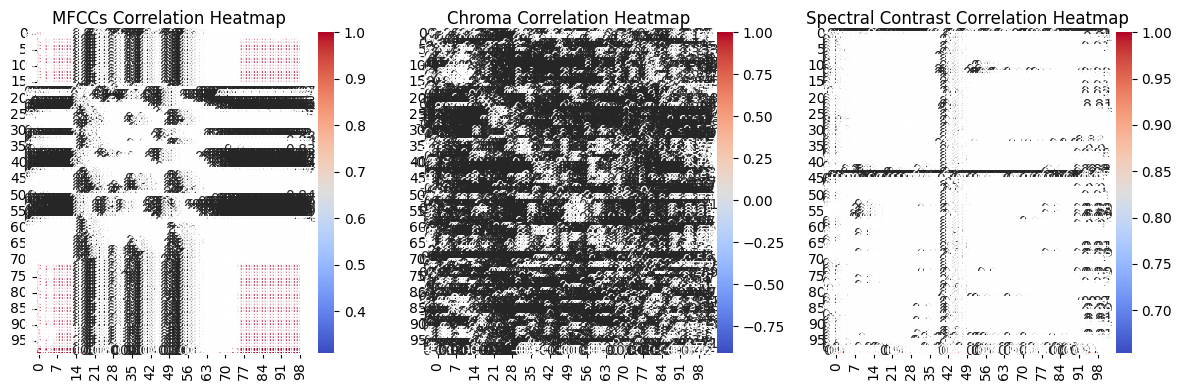

In [22]:
correlation_mfccs = np.corrcoef(mfccs, rowvar=False)
correlation_chroma = np.corrcoef(chroma, rowvar=False)
correlation_spectral_contrast = np.corrcoef(spectral_contrast, rowvar=False)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(correlation_mfccs, annot=True, cmap='coolwarm')
plt.title('MFCCs Correlation Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(correlation_chroma, annot=True, cmap='coolwarm')
plt.title('Chroma Correlation Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(correlation_spectral_contrast, annot=True, cmap='coolwarm')
plt.title('Spectral Contrast Correlation Heatmap')

plt.tight_layout()
plt.show()

## Gender

In [23]:
!pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 92.7 MB/s eta 0:00:0000:0100:01


In [24]:
import parselmouth
def extract_audio_features(audio_path):
    snd = parselmouth.Sound(audio_path)
    pitch = snd.to_pitch()
    formants = snd.to_formant_burg()
    intensity = snd.to_intensity()

    f0_values = pitch.selected_array['frequency']
    
    formant_times = [t * 0.001 for t in range(len(f0_values))]
    formant_values = np.array([formants.get_value_at_time(1, t) for t in formant_times])
    energy_values = intensity.values

    return f0_values, formant_values, energy_values

In [25]:
all_f0_values = []
all_formant_values = []
all_energy_values = []

In [26]:
for audio_file_name in os.listdir(directory_path):
    if audio_file_name.endswith(".wav"):
        f0, formants, energy = extract_audio_features(audio_path)

        all_f0_values.append(f0)
        all_formant_values.append(formants)
        all_energy_values.append(energy)

In [27]:
f0_values = np.array(all_f0_values)
formant_values = np.array(all_formant_values)
energy_values = np.array(all_energy_values)

In [28]:
energy_values

array([[[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       ...,

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]]])

## Age

In [29]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 45.8 MB/s eta 0:00:0000:0100:01


In [30]:
!pip install pydub aubio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.0/479.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for aubio: filename=aubio-0.4.9-cp310-cp310-linux_x86_64.whl size=150470 sha256=2be157032f5fb8ce75ed1d67880c6d81a5865c9d71f9177a845bd915c9e0aaf5
  Stored in directory: /root/.cache/pip/wheels/00/30/30/a06fe7e9c7fe740486c219851b2bc1c7ed4a97e9c257efd3d7
Successfully built aubio


In [31]:
# age
# def extract_age_features(audio_file):
#     snd = parselmouth.Sound(audio_file)
#     intensity = snd.to_intensity()
#     duration = snd.get_total_duration()
    
#     return duration
# durations = []

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import speech_recognition as sr
import aubio



/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [33]:
sia = SentimentIntensityAnalyzer()
def extract_speech_content(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)

    transcript = transcribe_audio(audio_path)

    sentiment_scores = sia.polarity_scores(transcript)

    return transcript, sentiment_scores

In [34]:

def extract_pitch(audio_path):
    pitch_obj = aubio.pitch("yin")
    audio_source = aubio.source(audio_path)

    pitch_values = []
    while True:
        samples, read = audio_source()
        if read:
            pitch = pitch_obj(samples)[0]
            pitch_values.append(pitch)
        else:
            break

    return pitch_values

In [35]:
def transcribe_audio(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.record(source)
        try:
            transcript = recognizer.recognize_google(audio)
        except sr.UnknownValueError:
            transcript = ""
    return transcript

In [36]:
all_transcripts = []
all_sentiment_scores = []
all_pitch_values = []
all_speaking_rates = []

In [ ]:
for audio_file_name in os.listdir(directory_path):
    if audio_file_name.endswith(".wav"):
        transcript, sentiment_scores = extract_speech_content(audio_path)
        pitch_values = extract_pitch(audio_path)
        speaking_rate = np.count_nonzero(pitch_values) / len(pitch_values)

        all_transcripts.append(transcript)
        all_sentiment_scores.append(sentiment_scores)
        all_pitch_values.append(pitch_values)
        all_speaking_rates.append(speaking_rate)

        

In [38]:
        
all_transcripts = np.array(all_transcripts)
all_sentiment_scores = np.array(all_sentiment_scores)
all_pitch_values = np.array(all_pitch_values)
all_speaking_rates = np.array(all_speaking_rates)


In [39]:
all_sentiment_scores

array([{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695},
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695},
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695}, ...,
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695},
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695},
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695}],
      dtype=object)

In [40]:

# plt.figure(figsize=(12, 6))
# plt.subplot(2, 2, 1)
# sns.histplot(all_sentiment_scores, bins=20, kde=True)
# plt.title("Sentiment Score Histogram")
# plt.xlabel("Sentiment Score")
# plt.ylabel("Frequency")

# plt.subplot(2, 2, 2)
# sns.histplot(all_pitch_values, bins=20, kde=True)
# plt.title("Pitch Value Histogram")
# plt.xlabel("Pitch Value (MIDI)")
# plt.ylabel("Frequency")

# plt.subplot(2, 2, 3)
# sns.histplot(all_speaking_rates, bins=20, kde=True)
# plt.title("Speaking Rate Histogram")
# plt.xlabel("Speaking Rate (Frames per Word)")
# plt.ylabel("Frequency")

# plt.subplot(2, 2, 4)
# sns.boxplot(data=all_sentiment_scores)
# plt.title("Sentiment Score Box Plot")
# plt.xlabel("Sentiment Score")

# plt.tight_layout()
# plt.show()


In [76]:
import pandas as pd
import numpy as np

arrays = [mfccs, chroma, spectral_contrast, f0_values, formant_values, all_pitch_values, energy_values, all_transcripts, all_sentiment_scores, all_speaking_rates]

max_length = max(len(arr) for arr in arrays)

def flatten(arr):
#     padded = np.pad(arr, (0, length - len(arr)), mode='constant')
    return arr.flatten()



mfccs_flat = flatten(mfccs)
chroma_flat = flatten(chroma)
spectral_contrast_flat = flatten(spectral_contrast)
f0_values_flat = flatten(f0_values)
formant_flat = flatten(formant_values)
all_pitch_values_flat = flatten(all_pitch_values)
energy_flat = flatten(energy_values)
transcript_flat = flatten(all_transcripts)
sentiment_flat = flatten(all_sentiment_scores)
speaking_flat = flatten(all_speaking_rates)

mfccs_flat_pad = max_length - len(mfccs_flat)
chroma_flat_pad = max_length - len(chroma_flat)
spectral_flat_pad = max_length - len(spectral_contrast_flat)
# f0_flat_pad = max_length - len(f0_values_flat)
# formant_flat_pad = max_length - len(formant_flat)
# pitch_flat_pad = max_length - len(all_pitch_values_flat)
# energy_flat_pad = max_length - len(energy_flat)
# transcript_flat_pad = max_length - len(transcript_flat)
# sentiment_flat_pad = max_length - len(sentiment_flat)
# speaking_flat_pad = max_length - len(speaking_flat)

data = {
    'MFCC': np.pad(mfccs_flat,(0, mfccs_flat_pad), mode = 'constant'),
    'Chroma': np.pad(chroma_flat,(0, chroma_flat_pad), mode = 'constant'),
    'SpectralContrast': np.pad(spectral_contrast_flat,(0, spectral_flat_pad), mode = 'constant'),
 
}

df = pd.DataFrame(data)

print(df.head())

         MFCC    Chroma  SpectralContrast
0 -620.808838  0.945109          1.799842
1 -545.379822  0.630143         10.970541
2 -491.683746  0.934065         16.203738
3 -478.101440  1.000000         21.204754
4 -478.082214  0.348262         15.844359


In [78]:
max_length = max(len(arr) for arr in [f0_values_flat, formant_flat, all_pitch_values_flat, energy_flat, transcript_flat, sentiment_flat, speaking_flat])
def pad_and_fill(arr, length, fill_value=np.nan):
    if len(arr) < length:
        return np.pad(arr, (0, length - len(arr)), mode='constant', constant_values=fill_value)
    return arr

f0_values_padded = pad_and_fill(f0_values_flat, max_length)
formant_padded = pad_and_fill(formant_flat, max_length)
all_pitch_values_padded = pad_and_fill(all_pitch_values_flat, max_length)
energy_padded = pad_and_fill(energy_flat, max_length)
transcript_padded = pad_and_fill(transcript_flat, max_length)
sentiment_padded = pad_and_fill(sentiment_flat, max_length)
speaking_padded = pad_and_fill(speaking_flat, max_length)


data_1 = {
    'F0': f0_values_padded,
    'Formant': formant_padded,
    'Pitch': all_pitch_values_padded,
    'Energy': energy_padded,
    'Transcript': transcript_padded,
    'Sentiment Scores': sentiment_padded,
    'Speaking Rate': speaking_padded
}

df_1 = pd.DataFrame(data_1)

print(df_1.head())

    F0  Formant        Pitch     Energy             Transcript  \
0  0.0      NaN     0.000000  37.928105  don't forget a jacket   
1  0.0      NaN  4986.637695  43.222321  don't forget a jacket   
2  0.0      NaN     0.000000  46.209574  don't forget a jacket   
3  0.0      NaN   293.304840  47.436570  don't forget a jacket   
4  0.0      NaN   153.031265  46.603790  don't forget a jacket   

                                    Sentiment Scores  Speaking Rate  
0  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  
1  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  
2  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  
3  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  
4  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  


In [79]:
result = pd.concat([df, df_1], axis=1)


In [83]:
result.info

<bound method DataFrame.info of                MFCC    Chroma  SpectralContrast   F0  Formant        Pitch  \
0       -620.808838  0.945109          1.799842  0.0      NaN     0.000000   
1       -545.379822  0.630143         10.970541  0.0      NaN  4986.637695   
2       -491.683746  0.934065         16.203738  0.0      NaN     0.000000   
3       -478.101440  1.000000         21.204754  0.0      NaN   293.304840   
4       -478.082214  0.348262         15.844359  0.0      NaN   153.031265   
...             ...       ...               ...  ...      ...          ...   
2061429         NaN       NaN               NaN  NaN      NaN          NaN   
2061430         NaN       NaN               NaN  NaN      NaN          NaN   
2061431         NaN       NaN               NaN  NaN      NaN          NaN   
2061432         NaN       NaN               NaN  NaN      NaN          NaN   
2061433         NaN       NaN               NaN  NaN      NaN          NaN   

            Energy             

In [84]:
audio_file_name1 = "1001_DFA_SAD_XX.wav"
audio_path1 = os.path.join(directory_path, audio_file_name1)
samples_1, sampling_rate_1 = librosa.load(audio_path, sr = None, mono = True, offset = 0.0, duration = None, res_type = 'kaiser_best')
len(samples_1), sampling_rate_1

(36409, 16000)

In [87]:
from IPython.display import Audio
Audio(audio_path1)

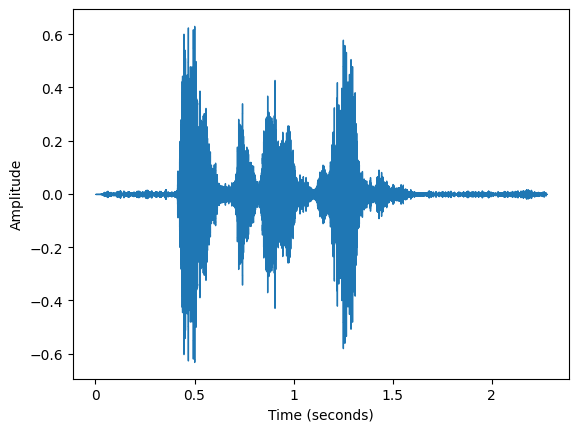

In [86]:
from librosa import display
plt.figure()
librosa.display.waveshow(y = samples_1, sr = sampling_rate_1)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [88]:
import numpy as np
from scipy.io import wavfile
_, audio_data1 = wavfile.read(audio_path1)
audio_data1 = audio_data.astype(np.float32)

In [91]:
y1, sr1 = librosa.load(audio_path1)

mfccs_1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13)
chroma_1 = librosa.feature.chroma_stft(y=y1, sr=sr1)
spectral_contrast1 = librosa.feature.spectral_contrast(y=y1, sr=sr1)

## Gender

In [92]:
all_f0_values_1 = []
all_formant_values_1 = []
all_energy_values_1 = []

for audio_file_name1 in os.listdir(directory_path):
    if audio_file_name1.endswith(".wav"):
        f0_1, formants1, energy1 = extract_audio_features(audio_path1)

        all_f0_values_1.append(f0_1)
        all_formant_values_1.append(formants1)
        all_energy_values_1.append(energy1)
        
f0_values_1 = np.array(all_f0_values_1)
formant_values_1 = np.array(all_formant_values_1)
energy_values_1 = np.array(all_energy_values_1)

## Age

In [93]:
sia1 = SentimentIntensityAnalyzer()


In [94]:
all_transcripts_1 = []
all_sentiment_scores_1 = []
all_pitch_values_1 = []
all_speaking_rates_1 = []

In [95]:
for audio_file_name1 in os.listdir(directory_path):
    if audio_file_name1.endswith(".wav"):
        transcript_1, sentiment_scores_1 = extract_speech_content(audio_path1)
        pitch_values_1 = extract_pitch(audio_path1)
        speaking_rate_1 = np.count_nonzero(pitch_values_1) / len(pitch_values_1)

        all_transcripts_1.append(transcript_1)
        all_sentiment_scores_1.append(sentiment_scores_1)
        all_pitch_values_1.append(pitch_values_1)
        all_speaking_rates_1.append(speaking_rate_1)
        
all_transcripts_1 = np.array(all_transcripts_1)
all_sentiment_scores_1 = np.array(all_sentiment_scores_1)
all_pitch_values_1 = np.array(all_pitch_values_1)
all_speaking_rates_1 = np.array(all_speaking_rates_1)


In [99]:
arrays_1 = [mfccs_1, chroma_1, spectral_contrast1, f0_values_1, formant_values_1, all_pitch_values_1, energy_values_1, all_transcripts_1, all_sentiment_scores_1, all_speaking_rates_1]

max_length_1 = max(len(arr) for arr in arrays_1)

mfccs_flat_1 = flatten(mfccs_1)
chroma_flat_1 = flatten(chroma_1)
spectral_contrast_flat_1 = flatten(spectral_contrast1)
f0_values_flat_1 = flatten(f0_values_1)
formant_flat_1 = flatten(formant_values_1)
all_pitch_values_flat_1 = flatten(all_pitch_values_1)
energy_flat_1 = flatten(energy_values_1)
transcript_flat_1 = flatten(all_transcripts_1)
sentiment_flat_1 = flatten(all_sentiment_scores_1)
speaking_flat_1 = flatten(all_speaking_rates_1)

mfccs_flat_pad_1 = max_length - len(mfccs_flat_1)
chroma_flat_pad_1 = max_length - len(chroma_flat_1)
spectral_flat_pad_1 = max_length - len(spectral_contrast_flat_1)

data_2 = {
    'MFCC': np.pad(mfccs_flat_1,(0, mfccs_flat_pad_1), mode = 'constant'),
    'Chroma': np.pad(chroma_flat_1,(0, chroma_flat_pad_1), mode = 'constant'),
    'SpectralContrast': np.pad(spectral_contrast_flat_1,(0, spectral_flat_pad_1), mode = 'constant'),
 
}

df_2 = pd.DataFrame(data_2)

print(df_2.head())

         MFCC    Chroma  SpectralContrast
0 -523.167480  0.393012         25.638554
1 -494.077118  0.206640         15.026407
2 -488.657288  0.093489         14.778195
3 -487.736481  0.093559         16.999425
4 -488.344910  0.145120         17.417290


In [100]:
max_length_2 = max(len(arr) for arr in [f0_values_flat_1, formant_flat_1, all_pitch_values_flat_1, energy_flat_1, transcript_flat_1, sentiment_flat_1, speaking_flat_1])
def pad_and_fill(arr, length, fill_value=np.nan):
    if len(arr) < length:
        return np.pad(arr, (0, length - len(arr)), mode='constant', constant_values=fill_value)
    return arr

f0_values_padded_1 = pad_and_fill(f0_values_flat_1, max_length_2)
formant_padded_1 = pad_and_fill(formant_flat_1, max_length_2)
all_pitch_values_padded_1 = pad_and_fill(all_pitch_values_flat_1, max_length_2)
energy_padded_1 = pad_and_fill(energy_flat_1, max_length_2)
transcript_padded_1 = pad_and_fill(transcript_flat_1, max_length_2)
sentiment_padded_1 = pad_and_fill(sentiment_flat_1, max_length_2)
speaking_padded_1 = pad_and_fill(speaking_flat_1, max_length_2)


data_3 = {
    'F0': f0_values_padded_1,
    'Formant': formant_padded_1,
    'Pitch': all_pitch_values_padded_1,
    'Energy': energy_padded_1,
    'Transcript': transcript_padded_1,
    'Sentiment Scores': sentiment_padded_1,
    'Speaking Rate': speaking_padded_1
}

df_3 = pd.DataFrame(data_3)

print(df_3.head())

           F0  Formant         Pitch     Energy                Transcript  \
0    0.000000      NaN  88200.000000  46.969735  don't forget to check in   
1    0.000000      NaN    103.956810  48.894100  don't forget to check in   
2    0.000000      NaN     88.140968  49.535356  don't forget to check in   
3    0.000000      NaN    602.566528  49.653914  don't forget to check in   
4  224.183062      NaN    305.311249  50.077280  don't forget to check in   

                                    Sentiment Scores  Speaking Rate  
0  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254  
1  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254  
2  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254  
3  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254  
4  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254  


In [101]:
result_1 = pd.concat([df_2, df_3], axis=1)

In [103]:
result_1.head()

MFCC    Chroma  SpectralContrast          F0  Formant         Pitch  \
0 -523.167480  0.393012         25.638554    0.000000      NaN  88200.000000   
1 -494.077118  0.206640         15.026407    0.000000      NaN    103.956810   
2 -488.657288  0.093489         14.778195    0.000000      NaN     88.140968   
3 -487.736481  0.093559         16.999425    0.000000      NaN    602.566528   
4 -488.344910  0.145120         17.417290  224.183062      NaN    305.311249   

      Energy                Transcript  \
0  46.969735  don't forget to check in   
1  48.894100  don't forget to check in   
2  49.535356  don't forget to check in   
3  49.653914  don't forget to check in   
4  50.077280  don't forget to check in   

                                    Sentiment Scores  Speaking Rate  
0  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254  
1  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254  
2  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254  
3  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254  
4  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...       0.968254

In [111]:
# result = result.append(result_1, ignore_index = True)

In [106]:
# result = pd.DataFrame(result)

In [107]:
result = pd.concat([result,result_1],ignore_index= True)

In [110]:
result.info

<bound method DataFrame.info of                MFCC    Chroma  SpectralContrast   F0  Formant        Pitch  \
0       -620.808838  0.945109          1.799842  0.0      NaN     0.000000   
1       -545.379822  0.630143         10.970541  0.0      NaN  4986.637695   
2       -491.683746  0.934065         16.203738  0.0      NaN     0.000000   
3       -478.101440  1.000000         21.204754  0.0      NaN   293.304840   
4       -478.082214  0.348262         15.844359  0.0      NaN   153.031265   
...             ...       ...               ...  ...      ...          ...   
4122863    0.000000  0.000000          0.000000  NaN      NaN          NaN   
4122864    0.000000  0.000000          0.000000  NaN      NaN          NaN   
4122865    0.000000  0.000000          0.000000  NaN      NaN          NaN   
4122866    0.000000  0.000000          0.000000  NaN      NaN          NaN   
4122867    0.000000  0.000000          0.000000  NaN      NaN          NaN   

            Energy             